## Balancing Data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import nltk 
import re
from re import search
import string
from nltk.corpus import stopwords

In [3]:
afp_cleaned = pd.read_csv("afp_cleaned.tsv").drop("Unnamed: 0", axis = 1)

In [4]:
afp_cleaned.head(3)

,title,subtitle,text,tag,date,author,url,rating
0,Vídeo em que cantora parece e...,NaN,um vídeo em que a cantora teresa cristina par...,brasil,2022-05-16,AFP Brasil,checamos.afp.com,0.0
1,Os 62 °C na Índia foram regis...,NaN,um mapa da índia foi compartilhado nas redes ...,ciência,2022-05-14,AFP Brasil,checamos.afp.com,0.0
2,"Nesta gravação de 2017, Lula ...",NaN,lula recusa descer do transporte para falar ...,brasil,2022-05-13,AFP Brasil,checamos.afp.com,0.0


In [5]:
afp_cleaned.shape

(135, 8)

In [6]:
afp_cleaned.isna().sum()

title         0
subtitle    135
text          0
tag           0
date          0
author        0
url           0
rating        0
dtype: int64

In [7]:
afp_cleaned = afp_cleaned.fillna("indisponível")

In [8]:
fatos_cleaned = pd.read_csv("aosfatos_cleaned.tsv").drop("Unnamed: 0", axis = 1)

In [9]:
fatos_cleaned.head(3)

,title,subtitle,text,tag,date,author,url,rating
0,Vídeo em que mar invade avenida no Rio de Jane...,NaN,não foi gravado recentemente um vídeo que most...,NaN,2022-05-23,Priscila Pacheco,aosfatos.org,0.0
1,Avião usado por Lula em 2019 não pertencia à X...,NaN,é falso que a xp investimentos emprestou um av...,NaN,2022-05-23,Priscila Pacheco,aosfatos.org,0.0
2,Lula não apareceu em capa da Forbes como uma...,NaN,é falso que uma capa da revista forbes indica ...,NaN,2022-05-20,Marco Faustino,aosfatos.org,0.0


In [10]:
fatos_cleaned.shape

(240, 8)

In [11]:
fatos_cleaned.isna().sum()

title         0
subtitle    240
text          0
tag         240
date          0
author        0
url           0
rating        0
dtype: int64

In [12]:
fatos_cleaned = fatos_cleaned.fillna("indisponível")

In [13]:
folha_cleaned = pd.read_csv("folha_cleaned.tsv").drop("Unnamed: 0", axis = 1)

In [14]:
folha_cleaned.head(3)

,title,subtitle,text,tag,date,author,url,rating
0,"Lula diz que está 'lascado', mas que ainda tem...",NaN,com a possibilidade de uma condenação impedir ...,política,2017-09-10,Folha de São Paulo,folha.uol.com.br,1.0
1,"'Decidi ser escrava das mulheres que sofrem', ...",NaN,"para oumou sangaré, cantora e ativista malines...",outros,2017-09-10,Folha de São Paulo,folha.uol.com.br,1.0
2,Três reportagens da Folha ganham Prêmio Petrob...,NaN,três reportagens da folha foram vencedoras do ...,política,2017-09-10,Folha de São Paulo,folha.uol.com.br,1.0


In [15]:
folha_cleaned.shape

(167053, 8)

In [16]:
folha_cleaned.isna().sum()

title            0
subtitle    167053
text           765
tag              0
date             0
author           0
url              0
rating           0
dtype: int64

In [17]:
folha_cleaned['subtitle'] = folha_cleaned['subtitle'].fillna("indisponível")

In [18]:
folha_cleaned = folha_cleaned.dropna()

In [19]:
folha_sample = folha_cleaned.sample(n=2)

In [20]:
fr_cleaned = pd.read_csv("fr_cleaned.tsv").drop("Unnamed: 0", axis = 1)

In [21]:
fr_cleaned.head(3)

,title,subtitle,text,tag,date,author,url,rating
0,Papa Francisco foi preso sob acusação de trá...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagão vaticano papar presar acusação tráfico ...,entretenimento,2021-11-01,EdgardMatsuki,boatos.org,0.0
1,Equador prepara cova coletiva para mortos por ...,NaN,o governar equador anunciar preparar cova cole...,saúde,2020-03-27,noticias.uol.com.br,noticias.uol.com.br,1.0
2,Air France voltará a operar voo direto Pequim ...,NaN,o companhia air france operar voar direto pequ...,saúde,2020-07-08,uol.com.br,uol.com.br,1.0


In [22]:
fr_cleaned.shape

(11886, 8)

In [23]:
fr_cleaned['rating'].value_counts()

1.0    5951
0.0    5935
Name: rating, dtype: int64

In [24]:
fr_cleaned.isna().sum()

title         30
subtitle    6318
text           0
tag            0
date         352
author       164
url            0
rating         0
dtype: int64

In [25]:
it = np.where(fr_cleaned['title'].isna())

In [26]:
for i in it:
    fr_cleaned['title'].iloc[i] = fr_cleaned['text'].iloc[i][0:50]

C:\Users\franc\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
fr_cleaned['subtitle'] = fr_cleaned['subtitle'].fillna("indisponível")

In [28]:
ita = list(np.where(fr_cleaned['author'].isna()))

In [29]:
for i in ita:
    fr_cleaned['author'].iloc[i] = fr_cleaned['url'].iloc[i]

In [30]:
fr_cleaned['title'] = fr_cleaned['title'].fillna("indisponível")

In [31]:
fr_cleaned['rating'].value_counts()

1.0    5951
0.0    5935
Name: rating, dtype: int64

In [32]:
fr_cleaned = fr_cleaned.dropna()

## Concatanating data "news"

In [33]:
news = pd.concat([fr_cleaned, afp_cleaned, fatos_cleaned, folha_sample], axis = 0)

In [34]:
news.head()

,title,subtitle,text,tag,date,author,url,rating
0,Papa Francisco foi preso sob acusação de trá...,Boato – Ocorreu um apagão no Vaticano. O papa ...,apagão vaticano papar presar acusação tráfico ...,entretenimento,2021-11-01,EdgardMatsuki,boatos.org,0.0
1,Equador prepara cova coletiva para mortos por ...,indisponível,o governar equador anunciar preparar cova cole...,saúde,2020-03-27,noticias.uol.com.br,noticias.uol.com.br,1.0
2,Air France voltará a operar voo direto Pequim ...,indisponível,o companhia air france operar voar direto pequ...,saúde,2020-07-08,uol.com.br,uol.com.br,1.0
3,Marfrig intensifica venda de carne do Brasil a...,indisponível,o marfrig global foods retomar vender carnar b...,saúde,2020-04-27,economia.uol.com.br,economia.uol.com.br,1.0
4,As parciais das eleições de 2014 alternaram ma...,indisponível,o assunto voltar o compartilhar rede social ju...,entretenimento,2021-07-31,GilmarLopes,e-farsas.com,0.0


In [35]:
duplicate = news[news.duplicated()] 
duplicate

,title,subtitle,text,tag,date,author,url,rating


In [36]:
news.drop_duplicates(inplace = True)
news.reset_index(drop = True, inplace = True)

In [37]:
from sklearn.utils import shuffle
news = shuffle(news).reset_index()

## Some more cleaning

In [38]:
def clean_author(a):

    if re.search(".", a) != None:
        a = a.split(".")
        a = a[0]
        
    if re.search("[A-Z][a-z]+", a) != None:
        pattern = ("[A-Z][a-z]+")
        name = re.findall(pattern, a)
        try:
            a = name[0] + " " + name[1] + " " + name[2]
        except:
            try:
                a = name[0] + " " + name[1]
            except: 
                pass
        
    return a

In [39]:
news["author"] = news['author'].apply(clean_author)

In [40]:
news["author"].isna().sum()

0

In [41]:
news["author"].value_counts()

noticias                2343
Edgard Matsuki          1346
G1                       543
Kyene Becker             499
gilmarlopes              469
                        ... 
Falc Fernanda Vivase       1
Felipe Fraz Monteiro       1
Luiza Souto                1
Fabio Manzano              1
Bianca Limae La            1
Name: author, Length: 1395, dtype: int64

In [42]:
news = news.drop(['index', 'subtitle'], axis =1)

In [43]:
news = news.dropna()

In [44]:
news

,title,text,tag,date,author,url,rating
0,Vacina contra covid 19 bancada por Bill Gates ...,o laboratório financiar bilionário fundador mi...,saúde,2020-06-04,uol,uol.com.br,1.0
1,Monja Coen está com sintomas de Covid 19 e f...,monge coen querido conhecer alguém convênio e ...,entretenimento,2020-08-04,Edgard Matsuki,boatos.org,0.0
2,o homem esfaquear cachorro bar morto facada,o notícia surgir o quinzena janeiro o redar so...,entretenimento,2019-01-17,gilmarlopes,e-farsas.com,0.0
3,PCC exibiu faixa Alexandre de Moraes no STF...,alguém lembrar pcc paz justiçar e liberdade al...,brasil,2020-05-29,Edgard Matsuki,boatos.org,0.0
4,Montagem falsifica imagem e coloca fuzil ao la...,imagem ex presidente dilma rousseff pt sentar ...,política,2019-04-23,Anita Grando Martins,noticias.uol.com.br,0.0
...,...,...,...,...,...,...,...
11906,Ajuda de setor privado na vacinação não seria ...,o sociólogo simon schwartzman especialista bra...,saúde,2021-01-28,noticias,noticias.uol.com.br,1.0
11907,É FAKE que pai de Guilherme Boulos seja dono ...,publicação rede social afirmar o pai candidata...,política,2020-11-29,Isabela Aleixo Globo,g1.globo.com,0.0
11908,No 2º semestre prioridade número um é a refor...,o presidente câmara rodrigar maio dem rj afirm...,política,2020-05-07,Vin Valfr Sandra,economia.uol.com.br,1.0
11909,Contas do governo têm em maio pior resultado d...,crise causar pandemia coronavírus contar gover...,política,2020-06-29,Bianca Limae La,g1.globo.com,1.0


## Preparing text column  for processing

In [45]:
news.text = news.text.apply(lambda x: re.sub('@\S+', ' ', x))
news.text[2764]

'ministério saudar investigar caso suspeito coronavírus brasil total infecção crescer rapidamente mundo vírus letal e causar doença grave epidemiar anterior reportagem atualizada s 17h20 29 01 20 o ministério saudar anunciar haver caso suspeito coronavírus país o informação coletiva imprensar d quarta feira 29 1 o ministério entanto nenhum caso análise provável caso notificar o início crise excluir exame descartar posteriormente'

In [46]:
# Remove any monetary symbol ($)
news.text = news.text.apply(lambda x: re.sub('\$', ' ', x))

# Remove any digits
news.text = news.text.apply(lambda x: re.sub('\w*\d\w*', ' ', x))

In [47]:
# Remove URLs
news.text = news.text.apply(lambda x: re.sub('https?://\S+|www\.\S+', ' ', x))

# Remove URL twitter
news.text = news.text.apply(lambda x: re.sub(r'pic.twitter.com/[\w]*', ' ', x))

# Remove bit.ly/
news.text = news.text.apply(lambda x: re.sub('bit.ly/', ' ', x))

# Remove \xa0
news.text = news.text.apply(lambda x: re.sub(u'\xa0', ' ', x))
news.text[2764]

'ministério saudar investigar caso suspeito coronavírus brasil total infecção crescer rapidamente mundo vírus letal e causar doença grave epidemiar anterior reportagem atualizada s         o ministério saudar anunciar haver caso suspeito coronavírus país o informação coletiva imprensar d quarta feira     o ministério entanto nenhum caso análise provável caso notificar o início crise excluir exame descartar posteriormente'

In [48]:
# Remove hashtags
news.text = news.text.apply(lambda x: re.sub('#', ' ', x))

In [49]:
# Remove punctuation
pont = set(string.punctuation)
news.text = news.text.apply(lambda x: "".join([ch for ch in x if ch not in pont]))

In [50]:
# Remove too many empty spaces
news.text = news.text.apply(lambda x: re.sub(' +', ' ', x))
news.text[2764]

'ministério saudar investigar caso suspeito coronavírus brasil total infecção crescer rapidamente mundo vírus letal e causar doença grave epidemiar anterior reportagem atualizada s o ministério saudar anunciar haver caso suspeito coronavírus país o informação coletiva imprensar d quarta feira o ministério entanto nenhum caso análise provável caso notificar o início crise excluir exame descartar posteriormente'

In [51]:
news['rating'].value_counts()

0.0    5958
1.0    5953
Name: rating, dtype: int64

In [52]:
news.isna().sum()

title     0
text      0
tag       0
date      0
author    0
url       0
rating    0
dtype: int64

In [53]:
news.to_csv("news.tsv")

## Exploring the data

In [54]:
# Describe
news.describe(exclude = np.datetime64, datetime_is_numeric = True)

,title,text,tag,date,author,url,rating
count,11911,11911,11911,11911,11911,11911,11911.000000
unique,11701,11909,7,1145,1395,16,NaN
top,Veja o que é FATO ou FAKE nas declarações do...,balançar vacinação covid d segunda feira pesso...,saúde,2022-05-24,noticias,noticias.uol.com.br,NaN
freq,12,2,4458,222,2343,4025,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.499790
std,NaN,NaN,NaN,NaN,NaN,NaN,0.500021
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [55]:
## Checking for data balance

In [56]:
rate=pd.get_dummies(news.rating)[0.0]

In [57]:
label_size = [rate.sum(),len(rate)-rate.sum()]

([<matplotlib.patches.Wedge at 0x1c3015d9c10>,
 [Text(-1.1999997391785902, -0.0007911834906489696, 'Fake'),
  Text(1.1999997392526607, 0.0007910711385648222, 'Real')],
 [Text(-0.6999998478541775, -0.00046152370287856555, '50.0%'),
  Text(0.6999998478973855, 0.0004614581641628129, '50.0%')])

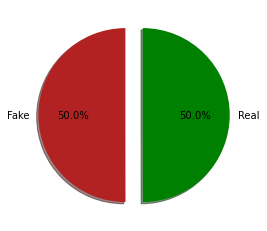

In [58]:
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','green'],startangle=90,shadow=True,labels=['Fake','Real'],autopct='%1.1f%%')

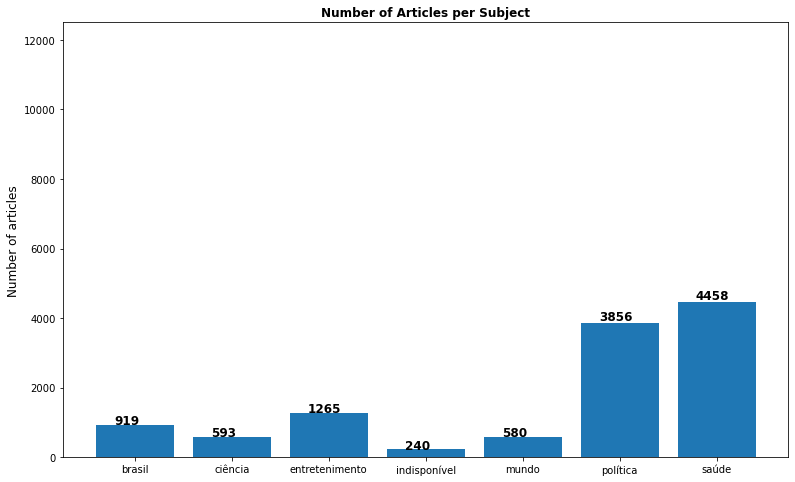

In [59]:
# Number of articles per tag
topics = list(news.tag.value_counts().sort_index().index)
values = list(news.tag.value_counts().sort_index().values)
 
plt.figure(figsize = (13, 8))

plt.bar(topics, values)

for index,data in enumerate(values):
    plt.text(x = (index-0.215), y = (data*1.02), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.title("Number of Articles per Subject", weight = 'bold', size = 12)
#plt.xlabel("Subjects", size = 12)
plt.ylabel("Number of articles", size = 12)
plt.ylim(0, 12500)
plt.show()

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


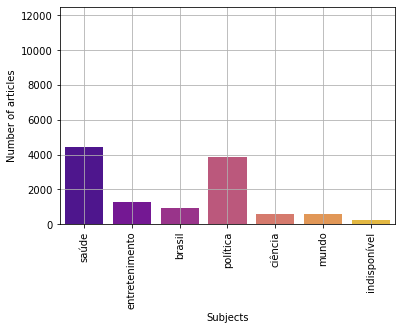

In [60]:
import seaborn as sns
sns.countplot(news.tag,palette='plasma')
plt.xticks(rotation=90)
plt.xlabel("Subjects", size = 10)
plt.ylabel("Number of articles", size = 10)
plt.ylim(0, 12500)
plt.grid(True)

In [61]:
#Correlation between subject and fake news

In [62]:
news_tag = pd.get_dummies(news.tag)

In [63]:
news_tag['rating'] = pd.get_dummies(news.rating)[0.0]

In [64]:
corr_data = abs(pd.DataFrame(news_tag.corr()['rating'])).drop('rating')

In [65]:
corr_data

,rating
brasil,0.242460
ciência,0.093122
entretenimento,0.343474
indisponível,0.143341
mundo,0.223030
política,0.074934
saúde,0.378871


Text(0, 0.5, 'Correlation')

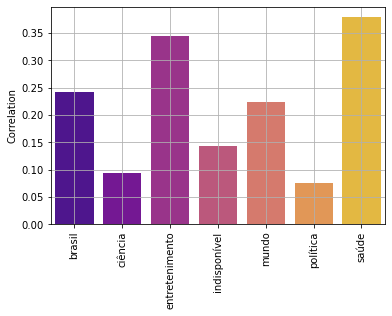

In [66]:
sns.barplot(x=corr_data.index,y=corr_data.rating,palette='plasma')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Correlation')

In [67]:
# Number of fake articles ber month-year 
news['date'] = pd.to_datetime(news['date'], errors='coerce')
news.date.dt.to_period('M').value_counts()

2020-04    749
2020-05    674
2020-03    673
2020-07    646
2020-11    621
          ... 
2018-07      2
2012-09      1
2016-04      1
2014-08      1
2017-09      1
Freq: M, Name: date, Length: 64, dtype: int64

In [68]:
# Selecting only month and year
news.date = news.date.dt.to_period('M')
news.head(2)

,title,text,tag,date,author,url,rating
0,Vacina contra covid 19 bancada por Bill Gates ...,o laboratório financiar bilionário fundador mi...,saúde,2020-06,uol,uol.com.br,1.0
1,Monja Coen está com sintomas de Covid 19 e f...,monge coen querido conhecer alguém convênio e ...,entretenimento,2020-08,Edgard Matsuki,boatos.org,0.0


In [69]:
# Criando colunas com mês e ano separados da coluna com datas
news['month'] = news.date.dt.month.apply(lambda x: calendar.month_abbr[x])
news['year'] = news.date.dt.year
news.head(2)

,title,text,tag,date,author,url,rating,month,year
0,Vacina contra covid 19 bancada por Bill Gates ...,o laboratório financiar bilionário fundador mi...,saúde,2020-06,uol,uol.com.br,1.0,Jun,2020
1,Monja Coen está com sintomas de Covid 19 e f...,monge coen querido conhecer alguém convênio e ...,entretenimento,2020-08,Edgard Matsuki,boatos.org,0.0,Aug,2020


In [70]:
# Creating pivot table to build the graph
news_pv = pd.pivot_table(news, index = news.month, columns = news.year, 
                            values = 'title', aggfunc = 'count', fill_value = 0)
news_pv = news_pv.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                                           'Sep', 'Oct', 'Nov', 'Dec'])
news_pv

year,2012,2014,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,,,
Jan,0,0,0,0,2,135,321,471,49
Feb,0,0,0,0,3,95,346,356,66
Mar,0,0,0,0,3,117,673,474,90
Apr,0,0,1,0,3,103,749,398,81
May,0,0,0,0,4,136,674,399,273
Jun,0,0,0,0,5,115,547,202,7
Jul,0,0,0,0,2,110,646,210,3
Aug,0,1,0,0,4,132,591,169,5
Sep,1,0,0,1,4,128,509,93,7


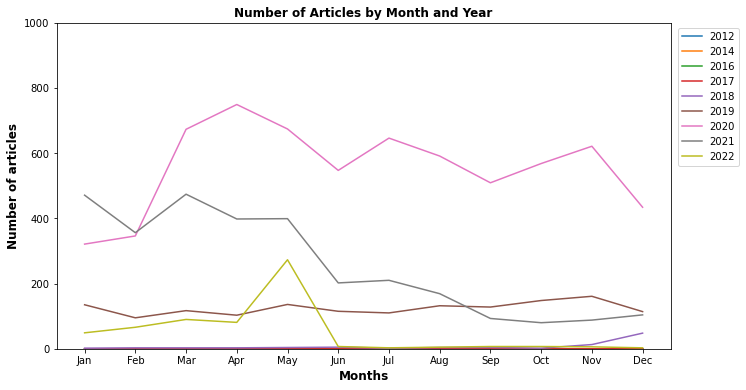

In [71]:
# Graph articles by month and year
ax = news_pv.plot(figsize = (11, 6))

ax.set_title('Number of Articles by Month and Year', weight = 'bold', size = 12)
ax.set_xlabel('Months', weight = 'bold', size = 12)
ax.set_ylabel('Number of articles', weight = 'bold', size = 12)
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(news_pv.index)
ax.axis(ymin = 0, ymax = 1000)
ax.legend(loc = 'upper right', bbox_to_anchor = (1.12, 1.0));

In [101]:
def remove_stopwords(l):
    stopwords.words('portuguese')
    without_sw = [word for word in l if not word in stopwords.words()]
    " ".join(without_sw)
    return without_sw

In [103]:
for column in news.columns:
    news[column] = news[column].apply(remove_stopwords)

KeyboardInterrupt: 

len(news.date.unique())

news.date.unique()

features = ['tag', 'date', 'month', 'year']

def count_plot(df, columns):
    plt.figure(figsize = (17, 9))
    for indx, var in enumerate(columns):
        # Graph
        plt.subplot(2, 2, (indx + 1))
        c = sns.countplot(x = var, hue = df['tag'], data = df, palette = ['#3232CD','#A62A2A'])

        # Legend
        leg = plt.legend(('Real', 'Fake'), loc = 'upper right', bbox_to_anchor = (1.0, 1.0), 
                         title = "$\\bf{Classe}$")
        # Border's color
        leg.get_frame().set_edgecolor('k')

        # Titles and formatting
        if indx == 0:
            plt.title('Number of Articles by Subject and Class', weight = 'bold', size = 14)
            plt.xlabel('Topics', weight = 'bold', size = 10)
            plt.ylabel('Number of articles', weight = 'bold', size = 10)
        elif indx == 2:
            plt.title('Number of Articles by Month by Class', weight = 'bold', size = 14)
            plt.xlabel('Mês', weight = 'bold', size = 10)
            plt.ylabel('Number of articles', weight = 'bold', size = 10)
        else:
            plt.title('Number of Articles by Year by Class', weight = 'bold', size = 14)
            plt.xlabel('Year', weight = 'bold', size = 10)
            plt.ylabel('Number of articles', weight = 'bold', size = 10)

    plt.tight_layout()
count_plot(news, features)

In [ ]:
real_news = " ".join(news[news['rating']==1.0]['text'])
print(real_news)

In [ ]:
#### Wordcloud for real news
plt.figure(figsize = (15,15))

wc = WordCloud(background_color = "white", max_words = 50, width = 1000, height = 500,
               stopwords = "portuguese").generate(real_news)
plt.imshow(wc, interpolation = 'bilinear')
plt.savefig('real.png')

In [ ]:
fake_news = " ".join(news[news['rating']==0.0]['text'])

In [ ]:
#### Wordcloud for fake news
plt.figure(figsize = (15,15))

wc = WordCloud(background_color = "white", max_words = 50, width = 1000, height = 500, 
               stopwords = "portuguese").generate(fake_news)
plt.imshow(wc, interpolation = 'bilinear')
plt.savefig('fake.png')

In [ ]:
#### Tag distribution
plt.figure(figsize = (7, 5))

histograma = plt.hist(news['tag'], bins = 7)

plt.title("Rating distribution", weight = 'bold', size = 16)
plt.xlabel('Classes', weight = 'bold', size = 14)
plt.ylabel('Number of articles', weight = 'bold', size = 14)
plt.ylim(0, 26000)
plt.show()

In [ ]:
seq_len = [len(i.split()) for i in news.text]
pd.Series(seq_len).hist(bins = 50,color='darkorchid', width=50)
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')
plt.savefig('worddistribution.png')

In [ ]:
# Bigram 

def plot_real_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='tab:cyan', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
plot_real_ngrams(real_news, "Top 20 Frequently Occuring True News", "Words", n=3)
plt.savefig('top 20.png')

In [ ]:
def plot_fake_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='indianred', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
plot_fake_ngrams(fake_news, 'Top 20 Frequently Occuring Fake News', "Words", n=3)

In [158]:
news.to_csv("news.tsv")